In [15]:
import numpy as np
import sklearn.datasets as ds
# print(ds)
import matplotlib.pyplot as plt # pyplot - imperative interface

iris = ds.load_iris()
# print(iris)

iris_x=iris["data"]
iris_y=iris["target"]
iris_x_labels = iris["feature_names"]
iris_y_labels = iris["target_names"]

setosa = np.where(iris_y==0)
versicolor = np.where(iris_y==1)
virginica = np.where(iris_y==2)

([<matplotlib.patches.Wedge at 0x7ae586ebf890>,
 [Text(0.5749999709776996, 0.9959292311081369, 'setosa'),
  Text(-1.0999999999999959, -9.616505800409723e-08, 'versicolor'),
  Text(0.5500003659264657, -0.9526277328950455, 'virginica')],
 [Text(0.324999983596091, 0.562916521930686, '33.333%'),
  Text(-0.5999999999999978, -5.2453668002234845e-08, '33.333%'),
  Text(0.30000019959625396, -0.5196151270336611, '33.333%')])

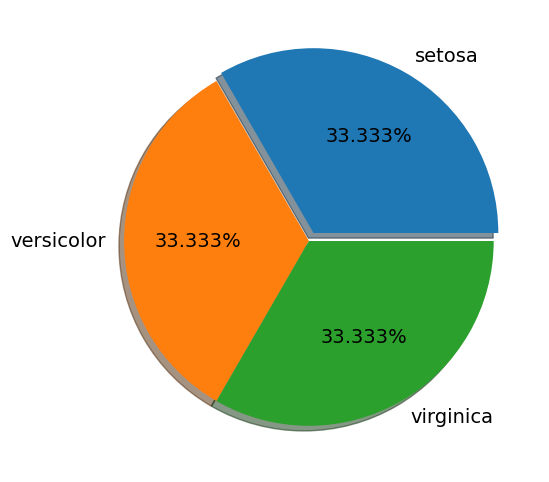

In [24]:
(unique, counts) = np.unique(iris_y, return_counts=True)
# print(unique, counts)

plt.figure(figsize=(6,6))
plt.pie(counts, labels=iris_y_labels, autopct="%1.3f%%", shadow=True, explode=(0.05, 0,0), textprops={"fontsize":14})


Text(0.5, 1.0, 'Iris class distribution')

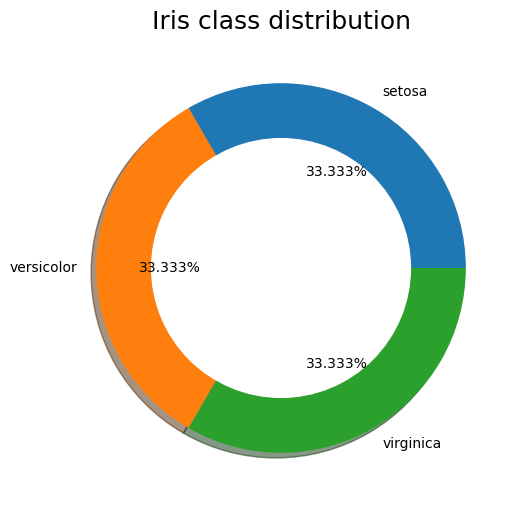

In [26]:
plt.figure(figsize=(6,6))
plt.pie(counts, labels=iris_y_labels, autopct="%1.3f%%", shadow=True, )
circle=plt.Circle(xy=(0,0), radius=0.7, color="white")
plt.gca().add_artist(circle)
plt.title("Iris class distribution", size=18)

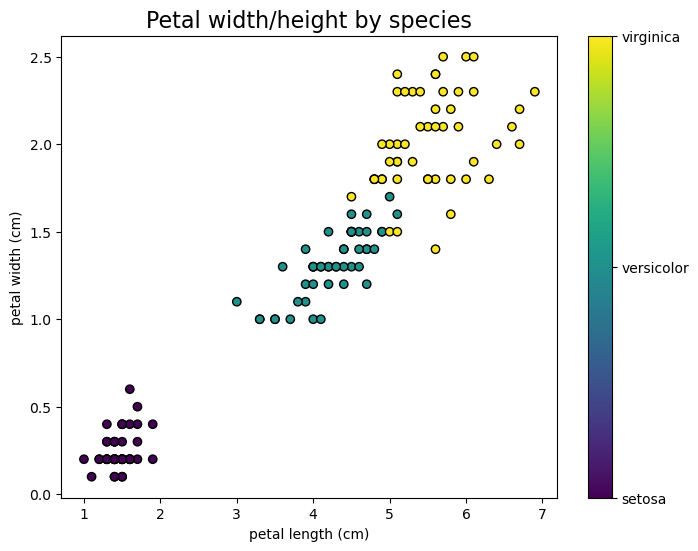

In [35]:
from matplotlib.ticker import FuncFormatter

formatter = FuncFormatter(lambda v, _: iris_y_labels[v])

plt.figure(figsize=(8,6))
plt.scatter(iris_x[:,2], iris_x[:,3], c=iris_y, edgecolor="k")
plt.xlabel(iris_x_labels[2])
plt.ylabel(iris_x_labels[3])
plt.title("Petal width/height by species", size=16)
plt.colorbar(ticks=[0,1,2], format=formatter)